# Computaional Drug Discovery [Part 5] Comparing Regressors
In part 5, we will be compairing several ML algorithms for building models of acetylcholinesterase inhibitors.

# Import libraries

In [1]:
! pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 11.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# 2. Load the data set

In [5]:
df =pd.read_csv('acetylcholinesterase_calculated_and_prepared_data_for_model_building.csv')
df

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.00
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.30
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.52
4,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,11091,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.89
11092,11092,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.70
11093,11093,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.23
11094,11094,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.92


In [6]:
X = df.drop('pIC50', axis=1)
X = X.iloc[:,1:]
X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11092,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11093,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11094,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = df.pIC50
Y

,pIC50
0,6.12
1,7.00
2,4.30
3,6.52
4,6.10
...,...
11091,5.89
11092,5.70
11093,6.23
11094,5.92


# 3. Data pre-processing

In [8]:
X.shape

(11096, 881)

In [10]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(11096, 118)

In [12]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Compare Ml algorithms

In [17]:
# Define and Builds the lazyclassifier
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
model_train, prediction_train = clf.fit(X_train, X_train, Y_train, Y_train)
model_test, prediction_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 8876, number of used features: 118
[LightGBM] [Info] Start training from score 6.745448
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 8876, number of used features: 118
[LightGBM] [Info] Start training from score 6.745448


In [18]:
# Preformance table of the Training set (80% subset)
prediction_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.59,0.59,0.72,58.13
ExtraTreeRegressor,0.59,0.59,0.72,0.15
DecisionTreeRegressor,0.59,0.59,0.72,0.17
ExtraTreesRegressor,0.59,0.59,0.72,6.12
XGBRegressor,0.58,0.59,0.72,0.48
RandomForestRegressor,0.58,0.59,0.72,3.79
BaggingRegressor,0.58,0.58,0.72,0.52
HistGradientBoostingRegressor,0.56,0.57,0.74,1.41
MLPRegressor,0.55,0.56,0.74,7.30


In [19]:
# Performmance  table if the test set (20% subset)
prediction_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.51,0.53,0.76,1.21
BaggingRegressor,0.51,0.53,0.76,0.72
HistGradientBoostingRegressor,0.51,0.53,0.76,1.28
RandomForestRegressor,0.51,0.53,0.76,6.23
MLPRegressor,0.48,0.51,0.78,17.94
ExtraTreesRegressor,0.48,0.51,0.78,4.85
DecisionTreeRegressor,0.48,0.51,0.78,0.15
NuSVR,0.48,0.51,0.78,12.52
ExtraTreeRegressor,0.48,0.50,0.78,0.13


# 5. Data Visualization of model performance

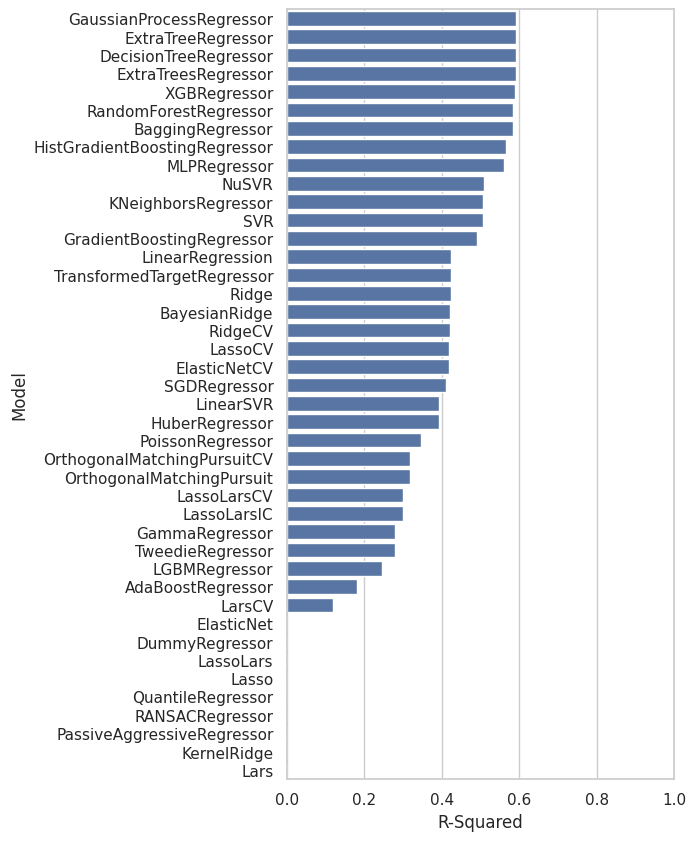

In [24]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="R-Squared", data=prediction_train)
ax.set(xlim=(0, 1))
plt.show()

[(0.0, 10.0)]

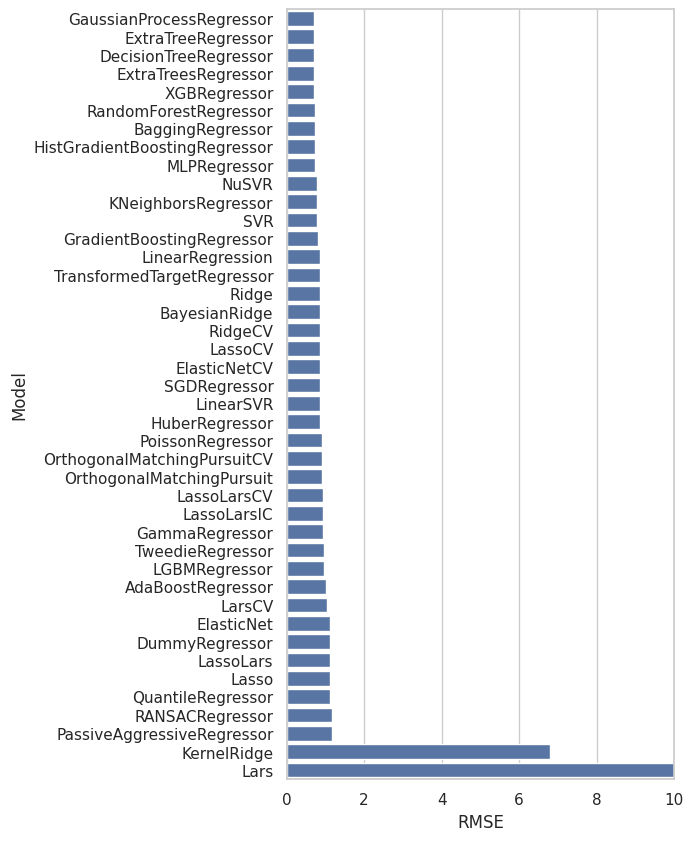

In [25]:
# bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="RMSE", data=prediction_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

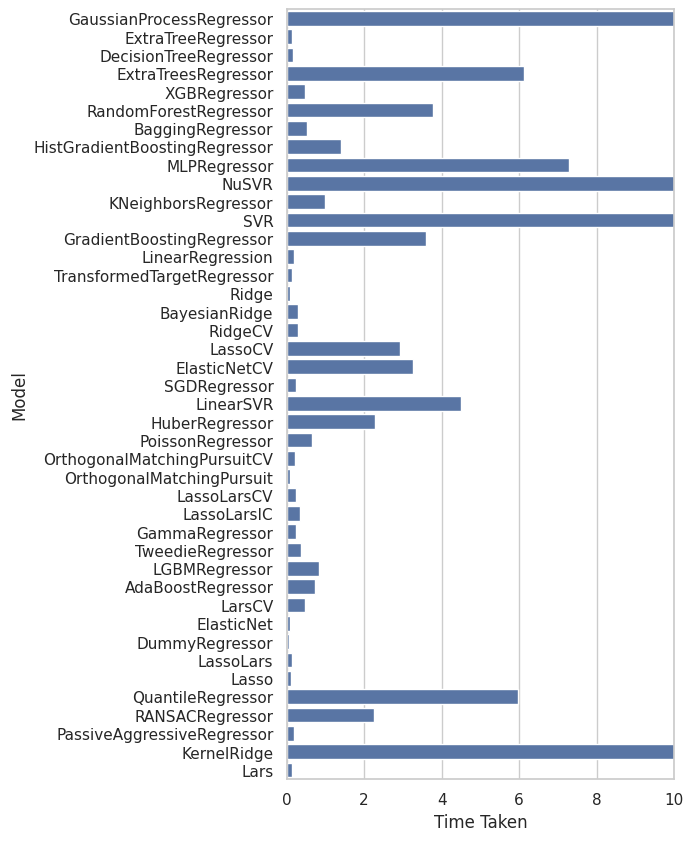

In [26]:
# Bar plot of calculator time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="Time Taken", data=prediction_train)
ax.set(xlim=(0, 10))